In [249]:
from datetime import datetime
import pandas as pd 
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [267]:
df = pd.read_csv('montreal.csv')
df.head(2)

datetime      Description  Humidity  Wind Direction  \
0  2012-10-01 13:00:00  overcast clouds      93.0           230.0   
1  2012-10-01 14:00:00     sky is clear      91.0           230.0   

   Temperature  Pressure  Wind Speed  
0    285.83000    1001.0         4.0  
1    285.83465     986.0         4.0

## General description/creation of date-time variables

In [268]:
df.describe()

Humidity  Wind Direction   Temperature      Pressure    Wind Speed
count  45252.000000    45252.000000  45252.000000  45252.000000  45252.000000
mean      71.861538      190.133541    280.343010   1016.424953      3.831897
std       16.506906       99.033739     11.953362      9.429197      2.483430
min        7.000000        0.000000    243.300000    822.000000      0.000000
25%       61.000000      111.000000    271.975250   1011.000000      2.000000
50%       73.000000      220.000000    281.105333   1016.000000      3.000000
75%       85.000000      260.000000    290.368750   1022.000000      5.000000
max      100.000000      360.000000    307.880000   1054.000000     24.000000

In [269]:
df.dtypes

datetime           object
Description        object
Humidity          float64
Wind Direction    float64
Temperature       float64
Pressure          float64
Wind Speed        float64
dtype: object

In [270]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['weekday'] = df['datetime'].dt.weekday
df.head(2)

datetime      Description  Humidity  Wind Direction  Temperature  \
0 2012-10-01 13:00:00  overcast clouds      93.0           230.0    285.83000   
1 2012-10-01 14:00:00     sky is clear      91.0           230.0    285.83465   

   Pressure  Wind Speed  year  month  day  hour  minute  weekday  
0    1001.0         4.0  2012     10    1    13       0        0  
1     986.0         4.0  2012     10    1    14       0        0

## Pandas Profiling

In [5]:
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

/Users/hannaswail/opt/anaconda3/lib/python3.7/site-packages/pandas_profiling/model/correlations.py:192: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
prof

## Most Common Descriptions

In [271]:
df.groupby('Description')['Description'].count().sort_values(ascending=False)

Description
broken clouds                   8151
sky is clear                    7299
overcast clouds                 6637
few clouds                      6317
light rain                      4015
scattered clouds                3407
mist                            3196
light snow                      1796
light intensity shower rain     1067
moderate rain                    770
heavy snow                       536
fog                              456
light shower snow                331
proximity shower rain            281
snow                             175
haze                             171
heavy intensity rain             168
heavy shower snow                119
light intensity drizzle          117
thunderstorm with light rain      69
proximity thunderstorm            39
thunderstorm                      31
smoke                             18
thunderstorm with rain            16
light intensity drizzle rain      14
shower rain                       11
light shower sleet        

In [272]:
df['desc count'] = df.groupby('Description')['Description'].transform('count')
df['desc general']=''
df.loc[df['desc count'] >= 1000, 'desc general'] = df['Description']
df.loc[df['desc count'] <= 1000, 'desc general'] = 'Other'
df.head(1)

datetime      Description  Humidity  Wind Direction  Temperature  \
0 2012-10-01 13:00:00  overcast clouds      93.0           230.0       285.83   

   Pressure  Wind Speed  year  month  day  hour  minute  weekday  desc count  \
0    1001.0         4.0  2012     10    1    13       0        0        6637   

      desc general  
0  overcast clouds

In [273]:
desc = df.groupby('desc general')['Humidity','Temperature','Pressure','Wind Speed','Wind Direction'].describe().unstack()
desc1= desc.unstack(level=1)
desc2=desc1['mean'].unstack()
desc2

/Users/hannaswail/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


desc general          Other  broken clouds   few clouds  \
Humidity          80.779416      65.992871    63.214052   
Temperature      278.922077     282.789921   281.175880   
Pressure        1012.854580    1016.335330  1019.523789   
Wind Speed         4.690229       3.991412     3.693209   
Wind Direction   185.395010     194.047111   208.117303   

desc general    light intensity shower rain   light rain   light snow  \
Humidity                          76.787052    81.780155    80.013363   
Temperature                      288.520037   279.592038   267.753770   
Pressure                        1009.516096  1013.947982  1013.844655   
Wind Speed                         4.757263     4.226152     4.812361   
Wind Direction                   194.959700   194.765131   166.124165   

desc general           mist  overcast clouds  scattered clouds  sky is clear  
Humidity          90.468639        71.705924         65.405170     68.611378  
Temperature      281.796230       278.666534        283.128478    279.448506  
Pressure        1010.952384      1015.006038       1017.919041   1021.486597  
Wind Speed         3.670839         4.167395          3.759613      2.583642  
Wind Direction   153.338548       167.573753        197.632815    208.163858

## Overall plots

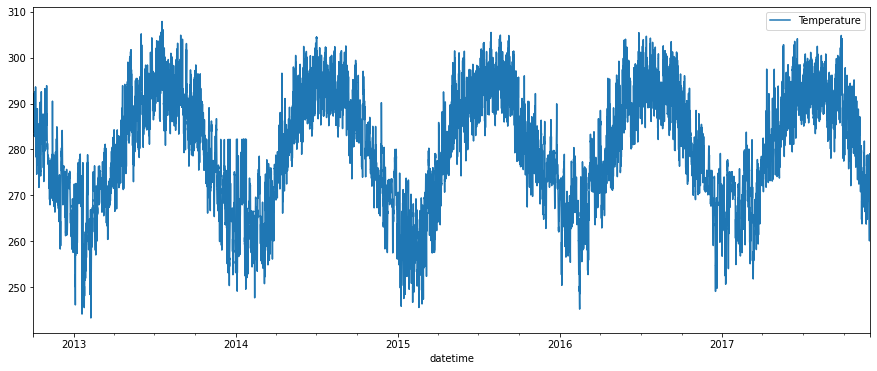

In [110]:
df2 = df[['datetime', 'Temperature']].set_index('datetime')
df2.plot(figsize=(15, 6))
plt.show()

<AxesSubplot:xlabel='datetime'>

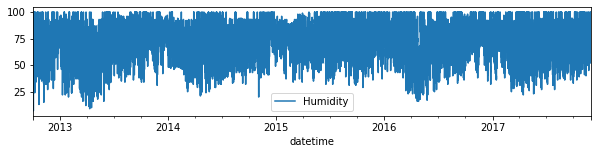

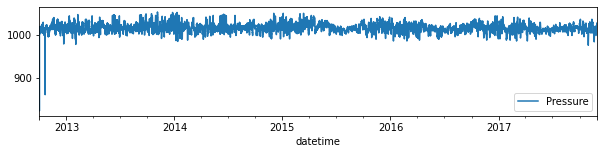

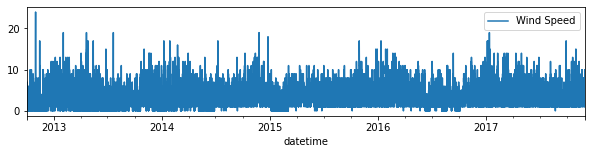

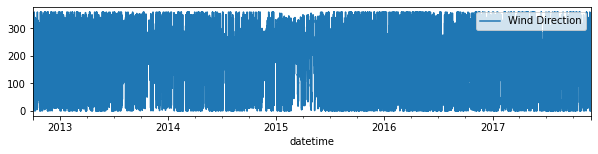

In [234]:
df2 = df[['datetime', 'Humidity']].set_index('datetime')
df2.plot(figsize=(10,2))
df3 = df[['datetime', 'Pressure']].set_index('datetime')
df3.plot(figsize=(10, 2))
df3 = df[['datetime', 'Wind Speed']].set_index('datetime')
df3.plot(figsize=(10, 2))
df3 = df[['datetime', 'Wind Direction']].set_index('datetime')
df3.plot(figsize=(10, 2))

### Resampled to daily/monthly level

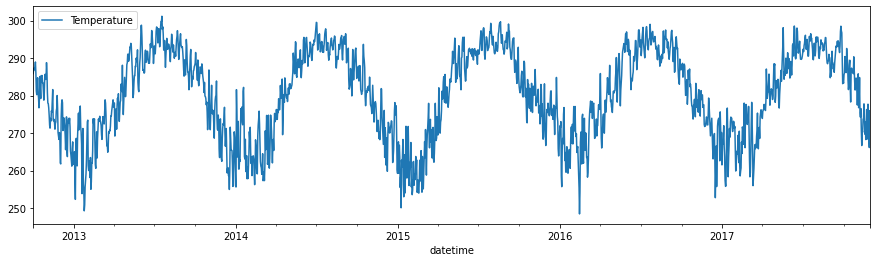

In [259]:
df2 = df[['datetime', 'Temperature']].set_index('datetime')
df_daily = df2.resample('D').mean()
df_daily.plot(figsize=(15, 4))
plt.show()

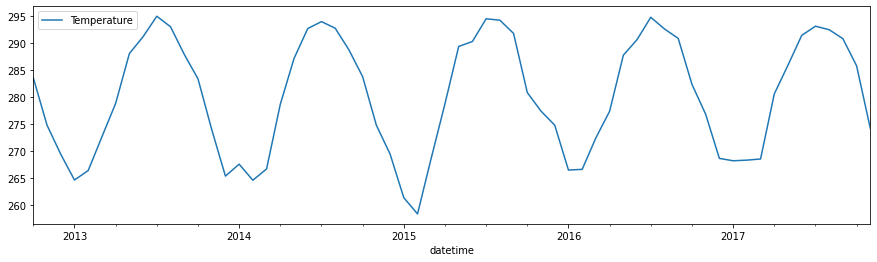

In [258]:
df2 = df[['datetime', 'Temperature']].set_index('datetime')
df_daily = df2.resample('M').mean()
df_daily.plot(figsize=(15, 4))
plt.show()

### Time unit breakdown vs. Features

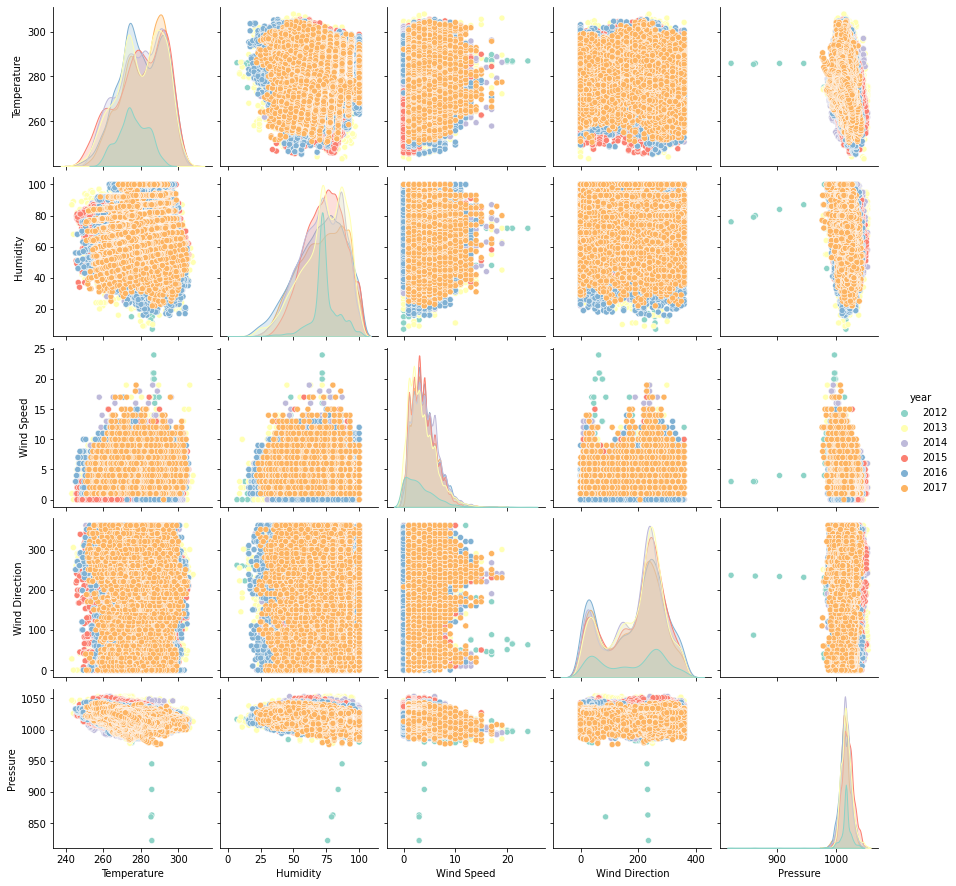

In [208]:
sns.pairplot(df[['Temperature','Humidity','Wind Speed','Wind Direction','Pressure','year']], 
             hue="year", height=2.5,palette="Set3",)

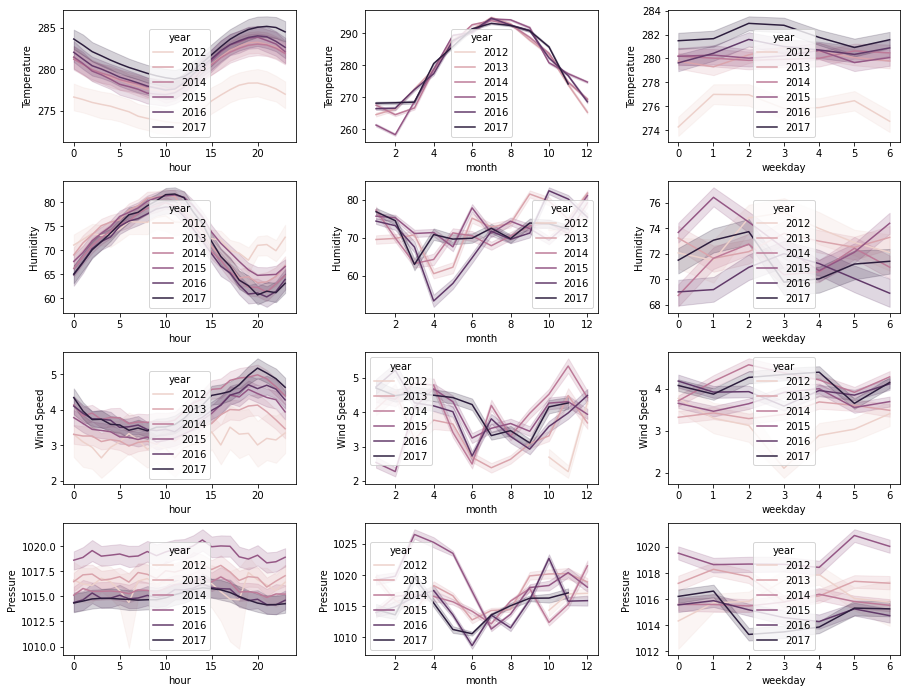

In [213]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
ax = fig.add_subplot(5, 3, 1)
sns.lineplot(x="hour", y="Temperature",hue="year",data=df)
ax = fig.add_subplot(5, 3, 2)
sns.lineplot(x="month", y="Temperature",hue="year",data=df)
ax = fig.add_subplot(5, 3, 3)
sns.lineplot(x="weekday", y="Temperature",hue="year",data=df)
ax = fig.add_subplot(5, 3, 4)
sns.lineplot(x="hour", y="Humidity",hue="year",data=df)
ax = fig.add_subplot(5, 3, 5)
sns.lineplot(x="month", y="Humidity",hue="year",data=df)
ax = fig.add_subplot(5, 3, 6)
sns.lineplot(x="weekday", y="Humidity",hue="year",data=df)
ax = fig.add_subplot(5, 3, 7)
sns.lineplot(x="hour", y="Wind Speed",hue="year",data=df)
ax = fig.add_subplot(5, 3, 8)
sns.lineplot(x="month", y="Wind Speed",hue="year",data=df)
ax = fig.add_subplot(5, 3, 9)
sns.lineplot(x="weekday", y="Wind Speed",hue="year",data=df)
ax = fig.add_subplot(5, 3, 10)
sns.lineplot(x="hour", y="Pressure",hue="year",data=df)
ax = fig.add_subplot(5, 3, 11)
sns.lineplot(x="month", y="Pressure",hue="year",data=df)
ax = fig.add_subplot(5, 3, 12)
sns.lineplot(x="weekday", y="Pressure",hue="year",data=df)
plt.show()

## Target versus Features

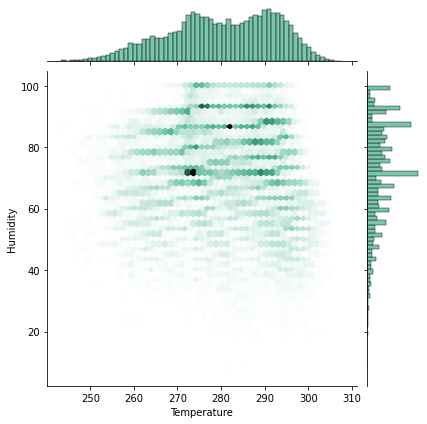

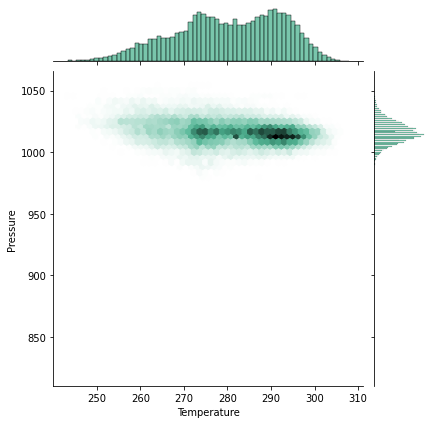

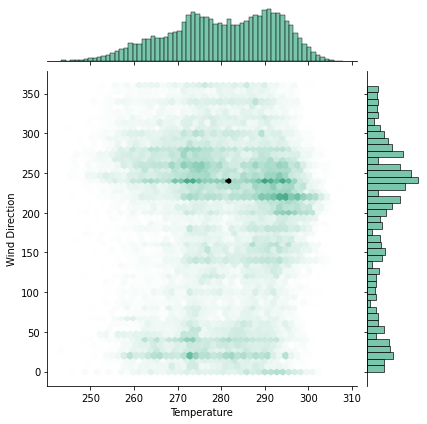

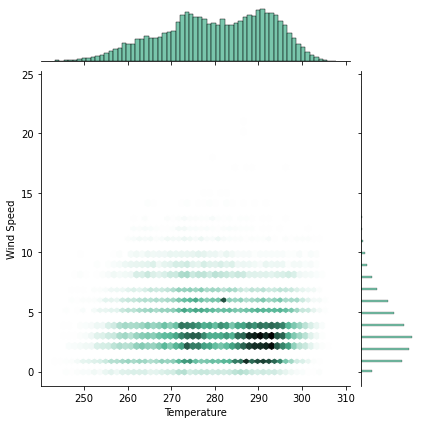

In [217]:
sns.jointplot(x='Temperature', y="Humidity", kind="hex", color="#4CB391",data=df)
sns.jointplot(x='Temperature', y="Pressure", kind="hex", color="#4CB391",data=df)
sns.jointplot(x='Temperature', y="Wind Direction", kind="hex", color="#4CB391",data=df)
sns.jointplot(x='Temperature', y="Wind Speed", kind="hex", color="#4CB391",data=df)

## Relationship with Description Variable

<AxesSubplot:xlabel='datetime', ylabel='Temperature'>

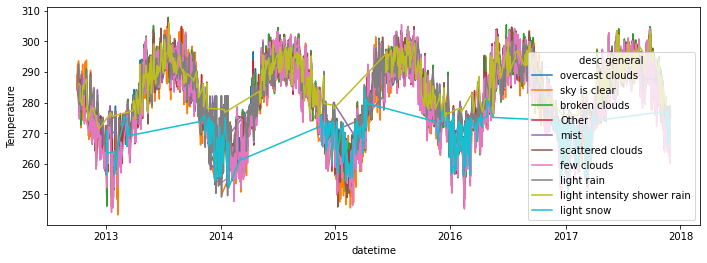

In [224]:
a4_dims = (11.7, 4)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(x="datetime", y="Temperature",hue="desc general",data=df,ax=ax)

<AxesSubplot:xlabel='Pressure', ylabel='Count'>

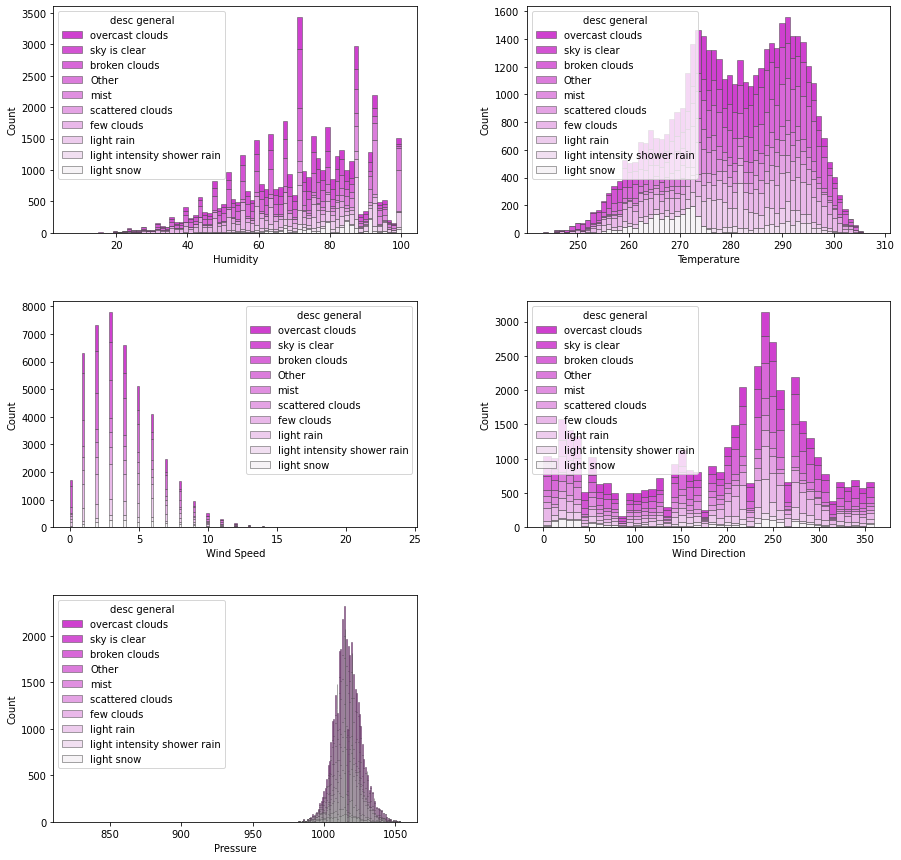

In [221]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.3, wspace=0.3)
ax = fig.add_subplot(3, 2, 1)
sns.histplot(df,x="Humidity", hue="desc general",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5,
    log_scale=False,)
ax = fig.add_subplot(3, 2, 2)
sns.histplot(df,x="Temperature", hue="desc general",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5,
    log_scale=False,)
ax = fig.add_subplot(3, 2, 3)
sns.histplot(df,x="Wind Speed", hue="desc general",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=0.5,
    log_scale=False)
ax = fig.add_subplot(3, 2, 4)
sns.histplot(df,x="Wind Direction", hue="desc general",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=0.5,
    log_scale=False)
ax = fig.add_subplot(3, 2, 5)
sns.histplot(df,x="Pressure", hue="desc general",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=0.5,
    log_scale=False)

## Further Feature Engineering

In [300]:
#append daily max
df['max daily temp']=df.resample('D')['Temperature'].transform('max')
df['max daily hum']=df.resample('D')['Humidity'].transform('max')
df['max daily wind speed']=df.resample('D')['Wind Speed'].transform('max')
df['max daily wind direction']=df.resample('D')['Wind Direction'].transform('max')
df['max daily pressure']=df.resample('D')['Pressure'].transform('max')
df.head(2)

Description  Humidity  Wind Direction  Temperature  \
datetime                                                                      
2012-10-01 13:00:00  overcast clouds      93.0           230.0    285.83000   
2012-10-01 14:00:00     sky is clear      91.0           230.0    285.83465   

                     Pressure  Wind Speed  year  month  day  hour  ...  \
datetime                                                           ...   
2012-10-01 13:00:00    1001.0         4.0  2012     10    1    13  ...   
2012-10-01 14:00:00     986.0         4.0  2012     10    1    14  ...   

                     min daily temp  min daily hum  min daily wind speed  \
datetime                                                                   
2012-10-01 13:00:00          285.83           57.0                   2.0   
2012-10-01 14:00:00          285.83           57.0                   2.0   

                    min daily wind direction  min daily pressure  \
datetime                                                           
2012-10-01 13:00:00                    230.0               822.0   
2012-10-01 14:00:00                    230.0               822.0   

                     max monthly temp  max monthly hum  \
datetime                                                 
2012-10-01 13:00:00             293.9            100.0   
2012-10-01 14:00:00             293.9            100.0   

                     max monthly wind speed  max monthly wind direction  \
datetime                                                                  
2012-10-01 13:00:00                    24.0                       360.0   
2012-10-01 14:00:00                    24.0                       360.0   

                     max monthly pressure  
datetime                                   
2012-10-01 13:00:00                1030.0  
2012-10-01 14:00:00                1030.0  

[2 rows x 29 columns]

In [299]:
#append monthly max
df['max monthly temp']=df.resample('M')['Temperature'].transform('max')
df['max monthly hum']=df.resample('M')['Humidity'].transform('max')
df['max monthly wind speed']=df.resample('M')['Wind Speed'].transform('max')
df['max monthly wind direction']=df.resample('M')['Wind Direction'].transform('max')
df['max monthly pressure']=df.resample('M')['Pressure'].transform('max')
df.head(2)

Description  Humidity  Wind Direction  Temperature  \
datetime                                                                      
2012-10-01 13:00:00  overcast clouds      93.0           230.0    285.83000   
2012-10-01 14:00:00     sky is clear      91.0           230.0    285.83465   

                     Pressure  Wind Speed  year  month  day  hour  ...  \
datetime                                                           ...   
2012-10-01 13:00:00    1001.0         4.0  2012     10    1    13  ...   
2012-10-01 14:00:00     986.0         4.0  2012     10    1    14  ...   

                     min daily temp  min daily hum  min daily wind speed  \
datetime                                                                   
2012-10-01 13:00:00          285.83           57.0                   2.0   
2012-10-01 14:00:00          285.83           57.0                   2.0   

                    min daily wind direction  min daily pressure  \
datetime                                                           
2012-10-01 13:00:00                    230.0               822.0   
2012-10-01 14:00:00                    230.0               822.0   

                     max monthly temp  max monthly hum  \
datetime                                                 
2012-10-01 13:00:00             293.9            100.0   
2012-10-01 14:00:00             293.9            100.0   

                     max monthly wind speed  max monthly wind direction  \
datetime                                                                  
2012-10-01 13:00:00                    24.0                       360.0   
2012-10-01 14:00:00                    24.0                       360.0   

                     max monthly pressure  
datetime                                   
2012-10-01 13:00:00                1030.0  
2012-10-01 14:00:00                1030.0  

[2 rows x 29 columns]

## Autocorrelation Plot
These show the correlation of each lagged observation and whether or not the correlation is statistically significant.

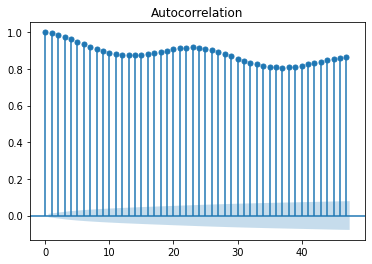

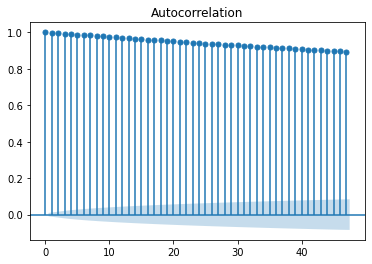

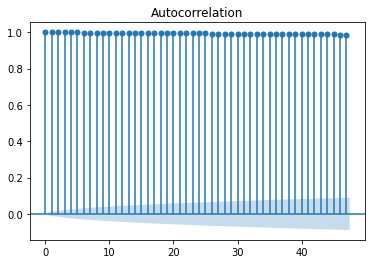

In [305]:
plot_acf(df[['Temperature']])
plot_acf(df[['max daily temp']])
plot_acf(df[['max monthly temp']])
plt.show()

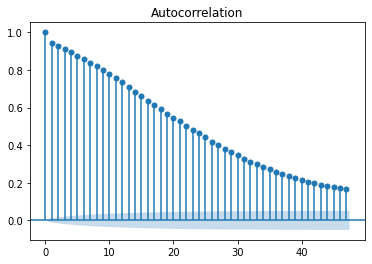

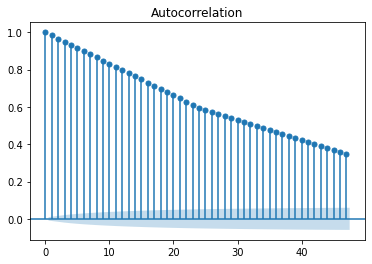

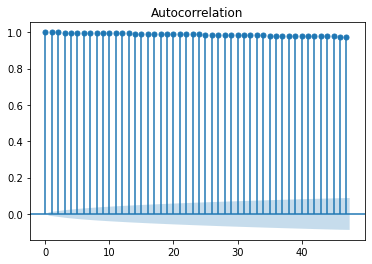

In [307]:
plot_acf(df[['Pressure']])
plot_acf(df[['max daily pressure']])
plot_acf(df[['max monthly pressure']])
plt.show()

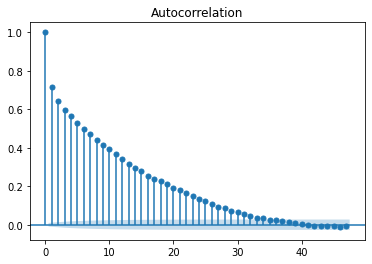

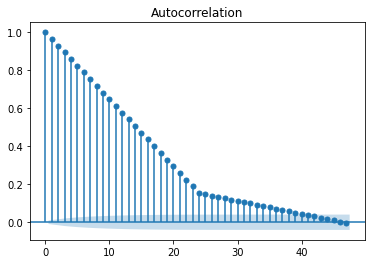

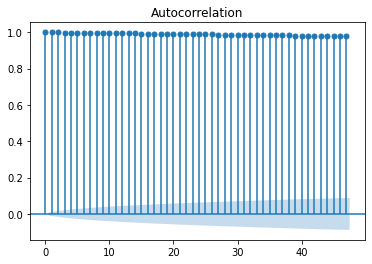

In [306]:
plot_acf(df[['Wind Direction']])
plot_acf(df[['max daily wind direction']])
plot_acf(df[['max monthly wind direction']])
plt.show()

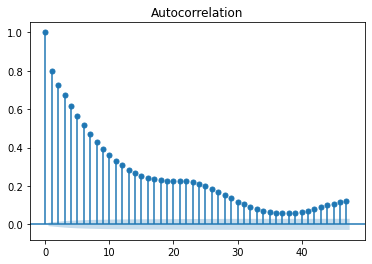

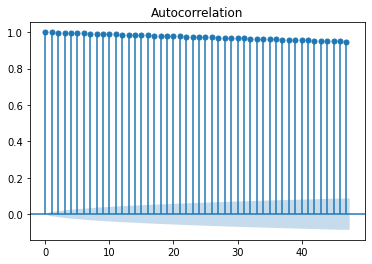

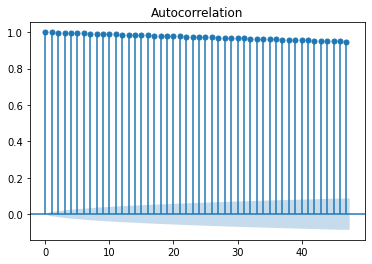

In [303]:
plot_acf(df[['Wind Speed']])
plot_acf(df['max monthly wind speed'])
plot_acf(df[['max monthly wind speed']])
plt.show()

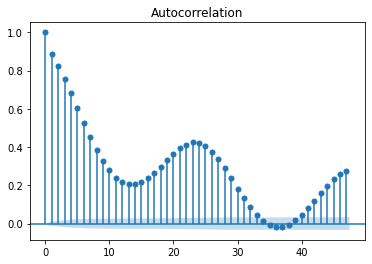

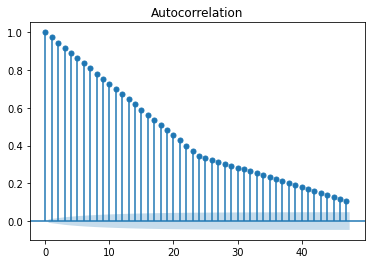

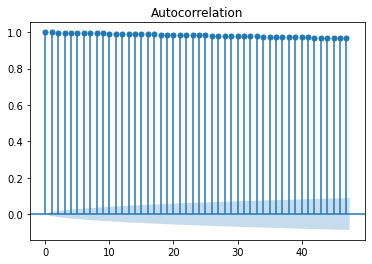

In [304]:
plot_acf(df[['Humidity']])
plot_acf(df[['max daily hum']])
plot_acf(df[['max monthly hum']])
plt.show()

## Partial Autocorrelation
The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

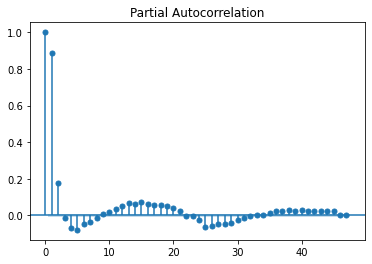

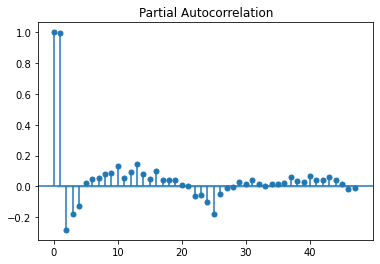

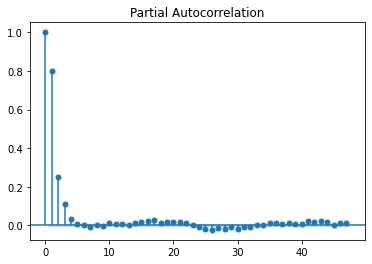

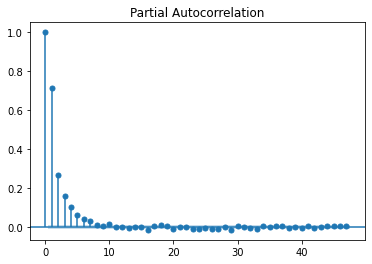

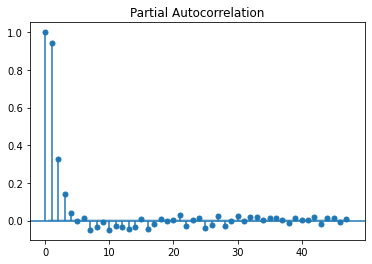

In [250]:
plot_pacf(df[['Humidity']])
plot_pacf(df[['Temperature']])
plot_pacf(df[['Wind Speed']])
plot_pacf(df[['Wind Direction']])
plot_pacf(df[['Pressure']])
plt.show()

Rand

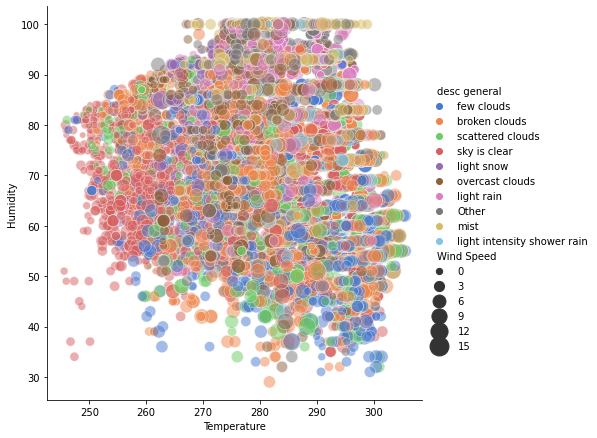

In [149]:
df2=df[df['year']==2015]
sns.relplot(x="Temperature", y="Humidity", hue="desc general", size="Wind Speed",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df2)

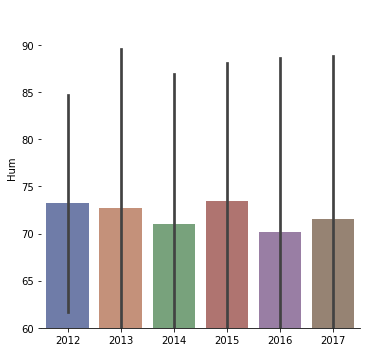

In [161]:
g = sns.catplot(data=df, kind="bar",x="year", y="Humidity", ci="sd", palette="dark", alpha=.6)
g.despine(left=True)
g.set_axis_labels("", "Hum")
g.set(ylim=60)

<AxesSubplot:xlabel='Humidity', ylabel='Count'>

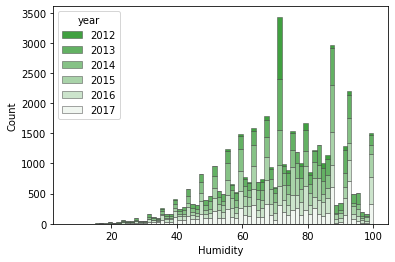

In [145]:
sns.histplot(df,x="Humidity", hue="year",multiple="stack",palette="light:g_r",edgecolor=".3",linewidth=0.5,
    log_scale=False)